### デバッグ用

In [1]:
import sys, os
sys.path.append(os.path.join(os.getcwd(), '..'))

### モジュールインポート

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rcParams
from sklearn.datasets import load_boston
from kennard_stone import _KennardStone
import numpy as np
import pandas as pd

### 乱数発生の再現性のため，固定

In [3]:
np.random.seed(334)

### 二次元の乱数発生

In [4]:
example = np.random.rand(2, 100)

### オブジェクト生成 & indexesを求める．

In [5]:
ks = _KennardStone(prior = 'train')
indexes = ks._get_indexes(example.transpose())

### matplotlibの諸変数設定

In [6]:
rcParams['font.size'] = 13
rcParams['font.family'] = 'Helvetica'

### 図示
満遍なく取ることができる

MovieWriter ffmpeg unavailable; using Pillow instead.


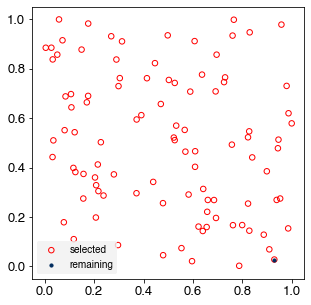

In [7]:
# figureオブジェクトの生成
fig = plt.figure(figsize = (5, 5), facecolor = 'white')
ax = fig.add_subplot(111)

# set_trace()
def scatter_(frame):    # 最初の引数は'frame' (何コマ目か)で固定．それ以外の引数はfargsでtupleとして与える．
    # 最初以外，グラフを一旦クリア
    if frame > 0:
        plt.cla()
    
    # scatter
    ax.scatter(*example[:, indexes[:frame]], label = 'selected', s = 30, facecolor = 'None', edgecolors = 'red')
    ax.scatter(*example[:, indexes[frame:]], label = 'remaining', s = 10, c = '#022c5e')

    # 正方形
    ax.set_aspect('equal', adjustable='box')

    # set_lim
    ax.set_xlim(-0.05, 1.05)
    ax.set_ylim(-0.05, 1.05)

    # legend
    ax.legend(facecolor = '#f0f0f0', edgecolor = 'None', fontsize = 10)

# gifアニメ作成
ani = FuncAnimation(fig, scatter_, interval = 200, frames = len(indexes))

# 保存
ani.save('simulate.gif')